In [1]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd
from sklearn.compose import make_column_selector as selector

In [2]:
data=pd.read_csv('regression_data.csv')

In [30]:
#data.to_csv('regression_data.csv',index=False)

In [3]:
data.columns

Index(['BidsPortfolioManager', 'BidsApi', 'BidsManual', 'Age', 'AppliedAmount',
       'Amount', 'Interest', 'LoanDuration', 'MonthlyPayment',
       'EmploymentDurationCurrentEmployer', 'IncomeTotal',
       'ExistingLiabilities', 'LiabilitiesTotal', 'RefinanceLiabilities',
       'DebtToIncome', 'FreeCash', 'MonthlyPaymentDay', 'CreditScoreEeMini',
       'PrincipalPaymentsMade', 'InterestAndPenaltyPaymentsMade',
       'PrincipalBalance', 'InterestAndPenaltyBalance',
       'NoOfPreviousLoansBeforeLoan', 'AmountOfPreviousLoansBeforeLoan',
       'PreviousEarlyRepaymentsCountBeforeLoan', 'EMI', 'ELA', 'ROI',
       'NewCreditCustomer', 'VerificationType', 'LanguageCode', 'Gender',
       'UseOfLoan', 'Education', 'MaritalStatus', 'EmploymentStatus',
       'OccupationArea', 'HomeOwnershipType', 'RecoveryStage', 'Rating',
       'Restructured', 'CreditScoreEsMicroL', 'Default'],
      dtype='object')

In [11]:
data

,BidsPortfolioManager,BidsApi,BidsManual,Age,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,EmploymentDurationCurrentEmployer,...,Education,MaritalStatus,EmploymentStatus,OccupationArea,HomeOwnershipType,RecoveryStage,Rating,Restructured,CreditScoreEsMicroL,Default
0,0.0,0.0,115.0410,61,319.5582,115.0408,30.00,12,101.13,UpTo3Years,...,Vocational education,other,Fully employed,NaN,other,Recovery,HR,False,M,Not Defaulter
1,0.0,0.0,140.6057,48,191.7349,140.6057,25.00,1,101.13,MoreThan5Years,...,Higher education,Married,Fully employed,Other,other,Recovery,HR,False,M,Not Defaulter
2,0.0,0.0,319.5580,58,319.5582,319.5409,25.00,20,101.13,Other,...,Secondary education,other,Fully employed,Mining,other,Recovery,HR,True,M,Defaulter
3,0.0,0.0,57.5205,23,127.8233,57.5205,45.00,15,101.13,UpTo3Years,...,Basic education,Cohabitant,Self-employed_Entrepreneur_Retiree,Processing,other,Recovery,HR,False,M,Not Defaulter
4,0.0,0.0,319.5582,25,319.5582,319.5436,30.00,12,101.13,UpTo3Years,...,Secondary education,Single,Fully employed,NaN,other,Recovery,HR,False,M,Defaulter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77389,2515.0,0.0,485.0000,37,3000.0000,3000.0000,31.01,60,107.68,MoreThan5Years,...,Vocational education,Cohabitant,Fully employed,Processing,Council house,Recovery,D,False,M,Defaulter
77390,1880.0,0.0,1120.0000,35,3000.0000,3000.0000,18.25,60,85.33,MoreThan5Years,...,Vocational education,Cohabitant,Fully employed,Construction,Owner,Collection,B,False,M,Not Defaulter
77391,1975.0,0.0,525.0000,40,2500.0000,2500.0000,24.83,60,80.42,MoreThan5Years,...,Vocational education,other,Self-employed_Entrepreneur_Retiree,Retail and wholesale,Owner,Recovery,HR,False,M,Defaulter
77392,1840.0,0.0,1160.0000,47,3000.0000,3000.0000,17.74,60,84.51,MoreThan5Years,...,Higher education,other,Fully employed,Hospitality and catering,Tenant_unfurnished propert,Recovery,B,True,M,Defaulter


In [4]:
data.dtypes

BidsPortfolioManager                      float64
BidsApi                                   float64
BidsManual                                float64
Age                                         int64
AppliedAmount                             float64
Amount                                    float64
Interest                                  float64
LoanDuration                                int64
MonthlyPayment                            float64
EmploymentDurationCurrentEmployer          object
IncomeTotal                               float64
ExistingLiabilities                         int64
LiabilitiesTotal                          float64
RefinanceLiabilities                        int64
DebtToIncome                              float64
FreeCash                                  float64
MonthlyPaymentDay                           int64
CreditScoreEeMini                         float64
PrincipalPaymentsMade                     float64
InterestAndPenaltyPaymentsMade            float64


In [5]:
num_cols=data.select_dtypes(include=['int','float']).columns
num_cols

Index(['BidsPortfolioManager', 'BidsApi', 'BidsManual', 'Age', 'AppliedAmount',
       'Amount', 'Interest', 'LoanDuration', 'MonthlyPayment', 'IncomeTotal',
       'ExistingLiabilities', 'LiabilitiesTotal', 'RefinanceLiabilities',
       'DebtToIncome', 'FreeCash', 'MonthlyPaymentDay', 'CreditScoreEeMini',
       'PrincipalPaymentsMade', 'InterestAndPenaltyPaymentsMade',
       'PrincipalBalance', 'InterestAndPenaltyBalance',
       'NoOfPreviousLoansBeforeLoan', 'AmountOfPreviousLoansBeforeLoan',
       'PreviousEarlyRepaymentsCountBeforeLoan', 'EMI', 'ELA', 'ROI'],
      dtype='object')

In [6]:
cat_cols=data.select_dtypes(exclude=['int','float']).columns
cat_cols

Index(['EmploymentDurationCurrentEmployer', 'NewCreditCustomer',
       'VerificationType', 'LanguageCode', 'Gender', 'UseOfLoan', 'Education',
       'MaritalStatus', 'EmploymentStatus', 'OccupationArea',
       'HomeOwnershipType', 'RecoveryStage', 'Rating', 'Restructured',
       'CreditScoreEsMicroL', 'Default'],
      dtype='object')

In [7]:
#0 Not set 1 Income unverified 2 Income unverified, cross-referenced by phone 3 Income verified 4 Income and expenses verified

In [8]:
data['VerificationType'] = data['VerificationType'].map({0.0: "Not set",1.0:"Income unverified",2.0:"Income unverified cross-referenced by phone",3.0:"Income verified",4.0:"Income and expenses verified"})
data['VerificationType'].value_counts()

Income and expenses verified                   41473
Income unverified                              25626
Income verified                                 8460
Income unverified cross-referenced by phone     1827
Not set                                            8
Name: VerificationType, dtype: int64

In [9]:
data['Default']=data['Default'].map({1:"Defaulter",0:"Not Defaulter"})
data['Default'].value_counts()

Defaulter        42794
Not Defaulter    34600
Name: Default, dtype: int64

In [10]:
data['LanguageCode']=data['LanguageCode'].map({0:"estonia",2:"Finish",3:"spanish",1:"other"})
data['LanguageCode'].value_counts()

estonia    33239
Finish     20302
spanish    16407
other       7446
Name: LanguageCode, dtype: int64

In [11]:
data['Gender']=data['Gender'].map({0.0:"Male",1.0:"Woman",2.0:"Undefined"})
data['Gender'].value_counts()

Male         50742
Woman        20927
Undefined     5725
Name: Gender, dtype: int64

In [12]:
# 0 Loan consolidation 1 Real estate 2 Home improvement 3 Business 4 Education 
# 5 Travel 6 Vehicle 7 Other 8 Health 101 Working capital financing 
# 102 Purchase of machinery equipment 103 Renovation of real estate
# 104 Accounts receivable financing 105 Acquisition of means of transport
# 106 Construction finance 107 Acquisition of stocks 108 Acquisition of real estate
# 109 Guaranteeing obligation 110 Other business All codes in format 1XX are for
# business loans that are not supported since October 2012

In [13]:
#1 Married 2 Cohabitant 3 Single 4 Divorced 5 Widow

In [14]:
data['MaritalStatus']=data['MaritalStatus'].map({1:"Married",2:"Cohabitant",3:"Single",4:"Divorced",5:"Widow",
                                                  -1:"other",0:"other"})
data['MaritalStatus'].value_counts()

Widow         44185
Cohabitant    11504
other          9630
Single         8479
Married        3077
Divorced        519
Name: MaritalStatus, dtype: int64

In [15]:
data['UseOfLoan']=data['UseOfLoan'].map({2:"Not set",0:"other",1:"Home improvement",3:"Loan consolidation",5:"Vehicle",6:"Travel"
                                         ,4:"Business",7:"Education",8:"Any",9:"Any",10:"Any",11:"Any",12:"Any"})
data['UseOfLoan'].value_counts()

Not set               50635
other                  8926
Home improvement       8102
Loan consolidation     2884
Vehicle                1743
Travel                 1621
Business               1367
Education              1259
Any                     857
Name: UseOfLoan, dtype: int64

In [16]:
#1 Primary education 2 Basic education 3 Vocational education 4 Secondary education 5 Higher education
data['Education']=data['Education'].map({2:"Basic education",1:"Primary education",3:"Vocational education",5:"Higher education",6:"other"
                                        ,4:"Secondary education"})
data['Education'].value_counts()

Secondary education     28602
Higher education        20919
Vocational education    17257
Basic education          5379
Primary education        5226
other                      11
Name: Education, dtype: int64

In [17]:
data['EmploymentStatus']=data['EmploymentStatus'].map({0:"Fully employed",1:"Self-employed_Entrepreneur_Retiree",-1:"Unemployed_Partially employed"})
data['EmploymentStatus'].value_counts()
#1 Unemployed 2 Partially employed 3 Fully employed 4 Self-employed 5 Entrepreneur 6 Retiree

Self-employed_Entrepreneur_Retiree    50085
Fully employed                        27309
Name: EmploymentStatus, dtype: int64

In [18]:
data['OccupationArea']=data['OccupationArea'].map({1:"Other",-1:"other",2:"Mining",3:"Processing", 4:"Energy",5:"Utilities",6:"Construction" ,
                                                   7:"Retail and wholesale",8:"Transport and warehousing",9:"Hospitality and catering",10:"Info and telecom",
                                                    11:"Finance and insurance",12:"Real-estate",13:"Research",14:"Administrative",15:"Civil service & military",
                                                    16:"Education",17:"Healthcare and social help",18:"Art and entertainment",19:"Agriculture,forestry and fishing"})
data['OccupationArea'].value_counts()
#1 Other 2 Mining 3 Processing 4 Energy 5 Utilities 6 Construction 7 Retail and wholesale 8 Transport and warehousing
# 9 Hospitality and catering 10 Info and telecom 11 Finance and insurance 12 Real-estate 13 Research 14 Administrative 
# 15 Civil service & military 16 Education 17 Healthcare and social help 
# 18 Art and entertainment 19 Agriculture, forestry and fishing

Administrative                      44239
Processing                           7640
Retail and wholesale                 3007
Real-estate                          2876
Construction                         2276
Hospitality and catering             2186
Mining                               2106
Energy                               1782
Education                            1555
Other                                1251
Transport and warehousing            1054
Research                              893
Art and entertainment                 798
Finance and insurance                 530
Civil service & military              524
Healthcare and social help            493
Utilities                             433
Info and telecom                      342
Agriculture,forestry and fishing      116
other                                  86
Name: OccupationArea, dtype: int64

In [19]:
#0 Homeless 1 Owner 2 Living with parents 3 Tenant, pre-furnished property 4 Tenant, 
#unfurnished property 5 Council house 6 Joint tenant 7 Joint ownership 8 Mortgage 9 Owner with encumbrance 10 Othe
data['HomeOwnershipType']=data['HomeOwnershipType'].map({0:"homeless",5:"Owner",-1:"other",3:"Tenant_pre-furnished property",
                                                         2:"Living with parents",6:"Mortgage",1:"Tenant_unfurnished propert",10:"other",
                                                         7:"Joint ownership",8:"Joint tenant",4:"Council house",9:"Owner with encumbrance"})
data['HomeOwnershipType'].value_counts()

Owner                            24594
Tenant_pre-furnished property    16842
Living with parents              12776
Mortgage                          8762
other                             4831
Tenant_unfurnished propert        4031
Joint ownership                   2701
Joint tenant                      1362
Council house                      882
Owner with encumbrance             565
homeless                            48
Name: HomeOwnershipType, dtype: int64

In [20]:
data['RecoveryStage']=data['RecoveryStage'].map({1:"Collection",2:"Recovery"})
data['RecoveryStage'].value_counts()
#Current stage according to the recovery model 1 Collection 2 Recovery 3 Write Off

Recovery      63428
Collection    13966
Name: RecoveryStage, dtype: int64

In [21]:
data['Rating']=data['Rating'].map({1:"F",0:"HR",3:"E",4:"D",2:"C",6:"B",5:"A",7:"AA"})
data['Rating'].value_counts()

F     15657
HR    14500
E     13151
D     12288
C     10420
B      6926
A      2819
AA     1633
Name: Rating, dtype: int64

In [22]:
data['CreditScoreEsMicroL']=data['CreditScoreEsMicroL'].map({0:"M",3:"M1",2:"M5",5:"M2",1:"M3",7:"M4",6:"M6",8:"M8",4:"M9",9:"M7",10:"M10"})
data['EmploymentDurationCurrentEmployer'].value_counts()

1    29328
3    14288
5    13777
0    10080
7     3344
2     3057
4     2901
6      619
Name: EmploymentDurationCurrentEmployer, dtype: int64

In [23]:
#MoreThan5Years  UpTo1Yea UpTo5Years UpTo3Years  Retiree  UpTo4Years  Other  missing  TrialPeriod
data['EmploymentDurationCurrentEmployer']=data['EmploymentDurationCurrentEmployer'].map({1:"MoreThan5Years",3:"UpTo1Year",5:"UpTo5Years",0:"UpTo3Years",7:"UpTo4Years",2:"Other",4:"Other",6:"TrialPeriod"})
data['EmploymentDurationCurrentEmployer'].value_counts()

MoreThan5Years    29328
UpTo1Year         14288
UpTo5Years        13777
UpTo3Years        10080
Other              5958
UpTo4Years         3344
TrialPeriod         619
Name: EmploymentDurationCurrentEmployer, dtype: int64

In [24]:
data['EmploymentDurationCurrentEmployer'].value_counts()

MoreThan5Years    29328
UpTo1Year         14288
UpTo5Years        13777
UpTo3Years        10080
Other              5958
UpTo4Years         3344
TrialPeriod         619
Name: EmploymentDurationCurrentEmployer, dtype: int64

In [25]:
#a measure of the probability of default one month ahead; the score is given on a 10-grade scale,
#from the best score to the worst: M1, M2, M3, M4, M5, M6, M7, M8, M9, M10.

In [26]:
data.isnull().sum()

BidsPortfolioManager                         0
BidsApi                                      0
BidsManual                                   0
Age                                          0
AppliedAmount                                0
Amount                                       0
Interest                                     0
LoanDuration                                 0
MonthlyPayment                               0
EmploymentDurationCurrentEmployer            0
IncomeTotal                                  0
ExistingLiabilities                          0
LiabilitiesTotal                             0
RefinanceLiabilities                         0
DebtToIncome                                 0
FreeCash                                     0
MonthlyPaymentDay                            0
CreditScoreEeMini                            0
PrincipalPaymentsMade                        0
InterestAndPenaltyPaymentsMade               0
PrincipalBalance                             0
InterestAndPe

In [27]:
# Step 1 -> train/test/split
X = data.drop(['EMI', 'ELA', 'ROI'], axis=1)
y = data[['EMI', 'ELA', 'ROI']]

In [28]:
cat_cols=X.select_dtypes(exclude=['int','float']).columns
cat_cols

Index(['EmploymentDurationCurrentEmployer', 'NewCreditCustomer',
       'VerificationType', 'LanguageCode', 'Gender', 'UseOfLoan', 'Education',
       'MaritalStatus', 'EmploymentStatus', 'OccupationArea',
       'HomeOwnershipType', 'RecoveryStage', 'Rating', 'Restructured',
       'CreditScoreEsMicroL', 'Default'],
      dtype='object')

In [29]:
num_cols=X.select_dtypes(include=['int','float']).columns
num_cols

Index(['BidsPortfolioManager', 'BidsApi', 'BidsManual', 'Age', 'AppliedAmount',
       'Amount', 'Interest', 'LoanDuration', 'MonthlyPayment', 'IncomeTotal',
       'ExistingLiabilities', 'LiabilitiesTotal', 'RefinanceLiabilities',
       'DebtToIncome', 'FreeCash', 'MonthlyPaymentDay', 'CreditScoreEeMini',
       'PrincipalPaymentsMade', 'InterestAndPenaltyPaymentsMade',
       'PrincipalBalance', 'InterestAndPenaltyBalance',
       'NoOfPreviousLoansBeforeLoan', 'AmountOfPreviousLoansBeforeLoan',
       'PreviousEarlyRepaymentsCountBeforeLoan'],
      dtype='object')

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .80)

In [32]:
ind=[]
for i in cat_cols:
    index=data.columns.get_loc(i)
    ind.append(index)

In [33]:
ind

[9, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42]

In [34]:
ind_num=[]
for i in num_cols:
    index=data.columns.get_loc(i)
    ind_num.append(index)

In [35]:
ind_num

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24]

In [37]:
# y_test=scale_y.transform(y_test)

In [38]:
# scale_y.inverse_transform(y_test)

In [39]:
# y_test

In [36]:
import pandas as pd
import xgboost as xg

C:\Users\ASUS\anaconda3\lib\site-packages\xgboost\compat.py:31: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [37]:
# train the model
from sklearn.multioutput import MultiOutputRegressor
multioutputregressor=MultiOutputRegressor(xg.XGBRegressor(objective='reg:squarederror',n_estimators=800,reg_lambda=1,gamma=0,max_depth=20,learning_rate=.5))


In [38]:
##visualize Pipeline
from sklearn import set_config
set_config(display="diagram")

# PIPELINE

In [39]:
# pipe = Pipeline([
#     ('IMPUTE',impute),
#     ('OHE',OHE),
#     ('SCALE_X',scale_x),
#     ('multioutputregressor',multioutputregressor)
# ])

In [40]:
numeric_processor=Pipeline(
    steps=[("imputation_mean",SimpleImputer(missing_values=np.nan,strategy="mean")),
          ("scaler",StandardScaler())]

)

In [41]:
categorical_processor=Pipeline(
    steps=[("imputation_mode",SimpleImputer(strategy='most_frequent')),
          ("onehot",OneHotEncoder(drop='first',sparse=False,handle_unknown="ignore"))]

)

In [42]:
preprocessor=ColumnTransformer(
    [("categorical",categorical_processor,selector(dtype_exclude=['int','float'])),
    ("numerical",numeric_processor,selector(dtype_include=['int','float']))]


)

In [43]:
preprocessor

ColumnTransformer(transformers=[('categorical',
                                 Pipeline(steps=[('imputation_mode',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x00000180B6DFA610>),
                                ('numerical',
                                 Pipeline(steps=[('imputation_mean',
                                                  SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x00000180BA261880>)])

In [44]:
pipe=make_pipeline(preprocessor,multioutputregressor)
pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('imputation_mode',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000180B6DFA610>),
                                                 ('numerical',
                                                  Pipeline(step...
                                                             importance_type='gain',
                                                             interaction_constraints=None,
                                                             learning_rate=0.5,
                                                             max_delta_step=None,
                                                             max_depth=20,
                                                             min_child_weight=None,
                                                             missing=nan,
                                                             monotone_constraints=None,
                                                             n_estimators=800,
                                                             n_jobs=None,
                                                             num_parallel_tree=None,
                                                             random_state=None,
                                                             reg_alpha=None,
                                                             reg_lambda=1,
                                                             scale_pos_weight=None,
                                                             subsample=None,
                                                             tree_method=None,
                                                             validate_parameters=None,
                                                             verbosity=None)))])

In [45]:
scaler_y=StandardScaler()
y_train=scaler_y.fit_transform(y_train)
y_test=scaler_y.transform(y_test)

In [46]:
# train
pipe_regression_model=pipe.fit(X_train,y_train)

In [47]:
pipe_regression_model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('imputation_mode',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000180B6DFA610>),
                                                 ('numerical',
                                                  Pipeline(step...
                                                             importance_type='gain',
                                                             interaction_constraints=None,
                                                             learning_rate=0.5,
                                                             max_delta_step=None,
                                                             max_depth=20,
                                                             min_child_weight=None,
                                                             missing=nan,
                                                             monotone_constraints=None,
                                                             n_estimators=800,
                                                             n_jobs=None,
                                                             num_parallel_tree=None,
                                                             random_state=None,
                                                             reg_alpha=None,
                                                             reg_lambda=1,
                                                             scale_pos_weight=None,
                                                             subsample=None,
                                                             tree_method=None,
                                                             validate_parameters=None,
                                                             verbosity=None)))])

In [48]:
y_pred=pipe.predict(X_test)

In [49]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

In [50]:
# model evaluation
print('Model Evaluation:')
print('mean_squared_error : ', mean_squared_error(y_test, y_pred))
print('mean_absolute_percentage_error : ', mean_absolute_percentage_error(y_test, y_pred))
print('R2_score : ', r2_score(y_test, y_pred))

Model Evaluation:
mean_squared_error :  0.007998731415520379
mean_absolute_percentage_error :  0.07436968422555092
R2_score :  0.9919250726134026


In [51]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Residual plot')

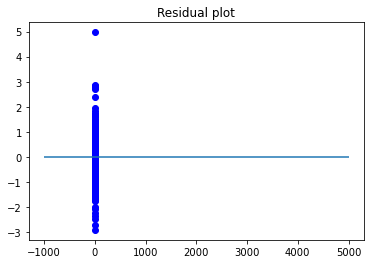

In [52]:
x_plot = plt.scatter(y_pred, (y_pred - y_test), c='b')

plt.hlines(y=0, xmin= -1000, xmax=5000)

plt.title('Residual plot')

In [53]:
y_pred[0]

array([0.5102058, 0.7963567, 1.0705498], dtype=float32)

In [54]:
y_test[0]

array([0.51022675, 0.79638884, 1.07054466])

In [55]:
import pickle
pickle.dump(pipe_regression_model,open('C:/Users/ASUS/TECHNOCOLAB_INTERNSHIP/ML_DEPLOYMENT_MODELS/regression_xgboost_pipeline.pkl',"wb"))

In [ ]:
# xgb = XGBRegressor(n_estimators=100)
# xgb.fit(X_train, y_train)
# sorted_idx = xgb.feature_importances_.argsort()
# plt.barh(boston.feature_names[sorted_idx], xgb.feature_importances_[sorted_idx])
# plt.xlabel("Xgboost Feature Importance")

In [67]:
# pipe_regression_model.get_booster().get_score(importance_type='gain')

In [10]:
data['Restructured'].unique()

array([False,  True])